# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

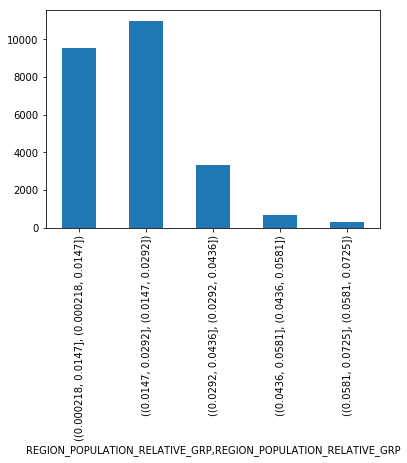

In [34]:
# REGION_POPULATION_RELATIVE: 客戶居住地區的人口數， 好奇這個欄位與還款是否有過困難（TARGET）有沒有關聯
app_train['REGION_POPULATION_RELATIVE'].describe()
# 用等寬劃分，分成五組
app_train["REGION_POPULATION_RELATIVE_GRP"] = pd.cut(app_train['REGION_POPULATION_RELATIVE'], 5)
app_train["REGION_POPULATION_RELATIVE_GRP"].value_counts()
# TARGET欄位的定義是：
#    1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
#    0 - all other cases) 
#    也就是說,1代表還款曾發生過困難

# 用柱狀圖，把REGION_POPULATION_RELATIVE各組發生過還款困難的客戶數畫出來
app_train_unable_to_pay = app_train.loc[app_train["TARGET"] == 1,"REGION_POPULATION_RELATIVE_GRP"]
ser = app_train_unable_to_pay.groupby(app_train_unable_to_pay).value_counts()
ser.plot.bar()

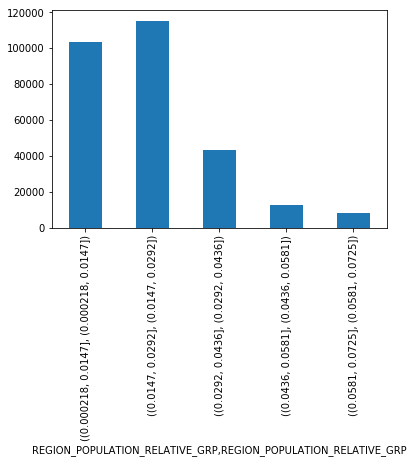

In [33]:
# 承上，換成還沒有發生還款困難者
app_train_able_to_pay = app_train.loc[app_train["TARGET"] == 0,"REGION_POPULATION_RELATIVE_GRP"]
ser = app_train_able_to_pay.groupby(app_train_able_to_pay).value_counts()
ser.plot.bar()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: YEARS_BIRTH_GRP, dtype: int64


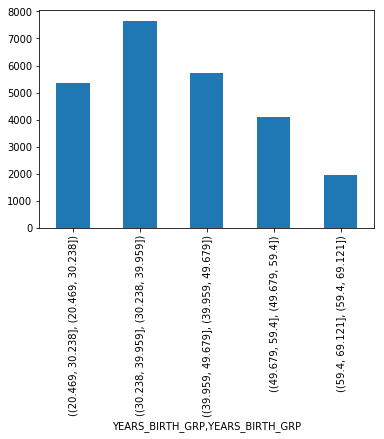

In [30]:
# 再來看看DAYS_BIRTH欄位
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365

# 用等寬劃分，分成五組
app_train["YEARS_BIRTH_GRP"] = pd.cut(app_train['YEARS_BIRTH'], 5)
print(app_train["YEARS_BIRTH_GRP"].value_counts())

# 用柱狀圖，把各組發生過還款困難的客戶數畫出來
app_train_unable_to_pay = app_train.loc[app_train["TARGET"] == 1,"YEARS_BIRTH_GRP"]
ser = app_train_unable_to_pay.groupby(app_train_unable_to_pay).value_counts()
ser.plot.bar()

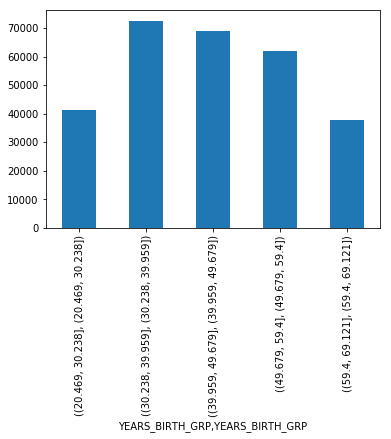

In [29]:
# 承上，把各組未曾發生過還款困難的客戶數畫出來
app_train_able_to_pay = app_train.loc[app_train["TARGET"] == 0,"YEARS_BIRTH_GRP"]
ser = app_train_able_to_pay.groupby(app_train_able_to_pay).value_counts()
ser.plot.bar()

Text(0, 0.5, 'unpay %')

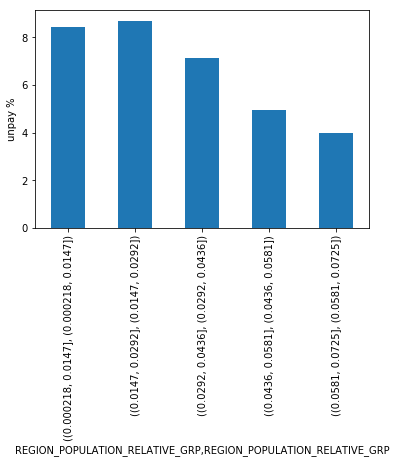

In [43]:
# 再做另個觀察，把各年齡組，發生還款困難者佔該組人數比例畫出來
ser_1 = app_train_unable_to_pay.groupby(app_train_unable_to_pay).value_counts()
ser_2 = app_train_able_to_pay.groupby(app_train_able_to_pay).value_counts()
ser_3 = ser_1 / (ser_1 + ser_2) * 100
ser_3.plot.bar()
plt.ylabel('unpay %')

### 從上圖來看
- 20~30､30~40這兩組，發生過還款困難的人數比例是最高的兩組
- 在這兩組之外（年齡在40以上的其它三組），還款困難的比例就逐漸降低。對應到實際經驗，或許和40以後工作與經濟收入都進入穩定，而貸款期間也進行末期有關。